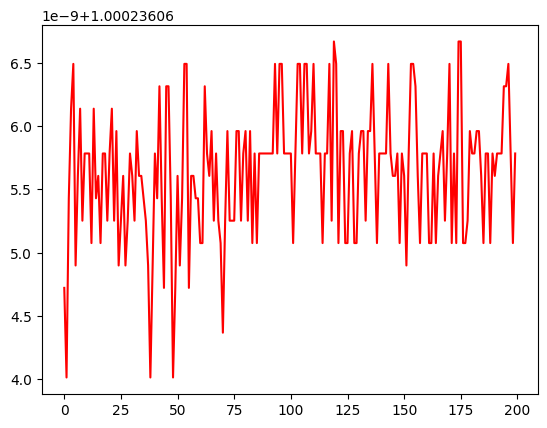

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

N_points = 200
R = 1
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 0.00001

vdisps = np.zeros((2 * len(curve), 2))
vdisps[0::2, :] = unit_normals(curve)
vdisps[1::2, :] = unit_normals(curve)
vdisps = vdisps * epsilon

# forces_perp = curve * p / R
A = populate_matrix(curve, step_theta, vdisps)

#here we do it forward, let's put in constant sigmas and see if the pressure comes out right

p = 1
sigmas = p / R * np.ones(len(curve)) #might have to divide by two
ms = np.zeros(len(curve))

state = np.zeros(2 * len(curve))

for i in range(len(curve)):
    state[2 * i] = sigmas[i]
    state[2 * i + 1] = ms[i]

pressures1 = np.dot(A, state)[0::2]
pressures2 = np.dot(A, state)[1::2]

for i, pressure in enumerate(pressures1):
    pressures1[i] = pressure / np.dot(unit_normals(curve)[i], vdisps[2 * i]) / ds(curve, i)

for i, pressure in enumerate(pressures2):

    pressures2[i] = pressure / np.dot(unit_normals(curve)[i], vdisps[2 * i + 1]) / ds(curve, i)

plt.plot(pressures1[:] , label='sigma', color='red')

In [3]:
pressures2[50]

np.float64(1.0002360656059521)

In [4]:
A[0]

array([ 4.93576415e-09, -1.99958796e-05,  2.46788208e-09,  9.99547488e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [5]:
(A[0,2] + A[0, -2])/A[0,-2]

np.float64(1.999999999999995)

In [6]:
l = [thetas[i]-thetas[i-1] for i in range(0,len(thetas))]

2 * np.pi + l[0]-l[1]

np.float64(-1.8041124150158794e-16)

In [7]:
pressures1[19]

np.float64(1.0002360652525557)

In [8]:
print(A[5,2])
print(-np.dot(unit_normals(curve)[50], vdisps[50])*ds(curve, 50))

print(ds(curve, 5))
print(np.dot(unit_normals(curve)[50], vdisps[2 * 50]))

2.4678820769961756e-09
-6.978577208892729e-09
0.03141463462364138
3.1415926535897943e-07


In [9]:
i = 0

point = curve[i]
temp = curve.copy()
temp[i] = point + vdisps[2 * i]
g1 = metric(temp, i, step_theta) 
g2 = metric(curve, i, step_theta)
dg = g1 - g2
print(g1, g2, dg)
print(curve[0], curve[1])
print(temp[0], temp[1])
print(curve[0,0]-temp[0,0])
print(vdisps[0])
np.linalg.norm(curve[i+1] - curve[i]) - np.linalg.norm(temp[1+i] - temp[i])

0.9999180702358457 0.9999177560024185 3.142334271677427e-07
[0.99987663 0.01570732] [0.99888987 0.04710645]
[0.99987695 0.01570732] [0.99888987 0.04710645]
-3.1412050827128724e-07
[3.14120508e-07 4.93459927e-09]


np.float64(-4.9361697368466295e-09)

In [10]:
0.5 * vdisps[4,0] ** 2 / ds(curve, 4)

np.float64(1.561190972723293e-12)

In [11]:
[np.linalg.norm(vdisps[i]) for i in range(15)]

[np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589793e-07),
 np.float64(3.141592653589793e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589793e-07),
 np.float64(3.141592653589793e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07)]

In [12]:
[np.dot(vdisps[2*i+1], curve[i+1] - curve[i]) for i in range(len(curve)-1)] 

[np.float64(-1.5501863300076957e-10),
 np.float64(-1.5501863300079449e-10),
 np.float64(-1.5501863300076378e-10),
 np.float64(-1.5501863300079045e-10),
 np.float64(-1.550186330007733e-10),
 np.float64(-1.5501863300076977e-10),
 np.float64(-1.55018633000783e-10),
 np.float64(-1.550186330007706e-10),
 np.float64(-1.550186330007797e-10),
 np.float64(-1.5501863300078508e-10),
 np.float64(-1.5501863300077267e-10),
 np.float64(-1.5501863300077184e-10),
 np.float64(-1.5501863300077474e-10),
 np.float64(-1.550186330007888e-10),
 np.float64(-1.5501863300078466e-10),
 np.float64(-1.5501863300076564e-10),
 np.float64(-1.5501863300078053e-10),
 np.float64(-1.550186330007673e-10),
 np.float64(-1.5501863300079542e-10),
 np.float64(-1.5501863300076233e-10),
 np.float64(-1.5501863300078797e-10),
 np.float64(-1.5501863300075737e-10),
 np.float64(-1.55018633000807e-10),
 np.float64(-1.550186330007491e-10),
 np.float64(-1.550186330008037e-10),
 np.float64(-1.5501863300075406e-10),
 np.float64(-1.55018633

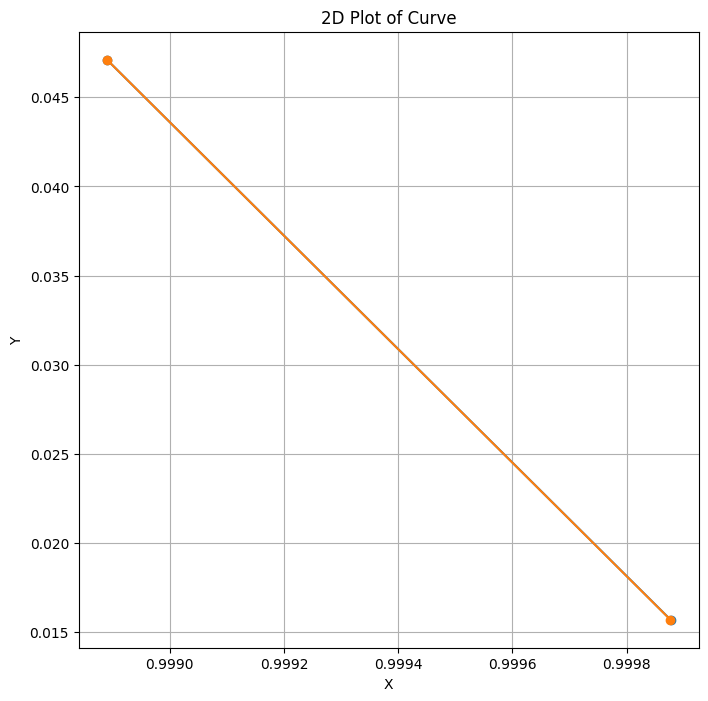

In [13]:

plt.figure(figsize=(8, 8))
#plt.plot(curve[0:2, 0], curve[0:2, 1], marker='o')
plt.plot(temp[i:i+2, 0], temp[i:i+2, 1], marker='o')
plt.plot(curve[i:i+2, 0], curve[i:i+2, 1], marker='o')

# plt.scatter(np.array([2-vdisps[0,0]]), np.array([0]), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Plot of Curve')
plt.grid(True)
plt.show()

# so that was forward with the matrix, let's do it backwards

In [14]:
rhs = np.zeros(2 * len(curve))

for i in range(len(curve)):
    ds_i = ds(curve, i)
    rhs[2 * i] = -np.dot(unit_normals(curve)[i], vdisps[2 * i]) * ds_i
    rhs[2 * i + 1] = -np.dot(unit_normals(curve)[i], vdisps[2 * i + 1]) * ds_i

x = np.linalg.solve(A, rhs)

LinAlgError: Singular matrix

## ok singular matrix, duh. let's try generating vdisps differently.

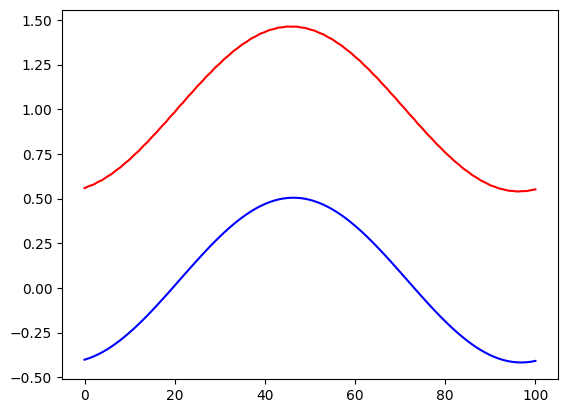

In [18]:
#DO NOT TOUCH THIS F'N CELL OR ANY OF THE FUNCTIONS IN IT. 
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt
from sets import *

def unit_normals_bad(curve):
    out = np.zeros((len(curve), 2))
    for i in range(len(curve)-1):
        gradient = (curve[i + 1] - curve[i])
        gradient = gradient / np.linalg.norm(gradient)
        out[i] = np.array([-gradient[1], gradient[0]])

    gradient = (curve[0] - curve[-1])
    gradient = gradient / np.linalg.norm(gradient)
    out[-1] = np.array([-gradient[1], gradient[0]])

    return -out

N_points = 101
R = 1
thetaspan = 2 * np.pi
L = 2 * np.pi * R

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 1e-7

vdisps = np.random.rand(2 * len(curve), 2) - 0.5
#CHANGE 1: NORMALIZING THE DISPLACEMENTS: no problem (even more regular it seems)
vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, None]
vdisps = vdisps * epsilon

p = 1
forces_perp = unit_normals(curve) * p

A = populate_matrix(curve, step_theta, vdisps)
b = populate_rhs(curve, forces_perp, vdisps)

soln = np.linalg.solve(A, b)

sigmas = soln[0::2]
ms = soln[1::2]

sigmas, ms = backward_solver_set(curve, L, len(curve), prec=1e-7)

plt.plot(sigmas, label='sigma', color='red')
plt.plot(ms, label='m', color='blue')

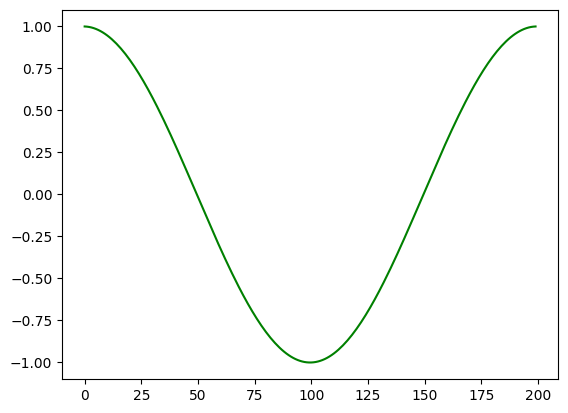

In [29]:
plt.plot(forces_perp[:,0], label='force', color='green')

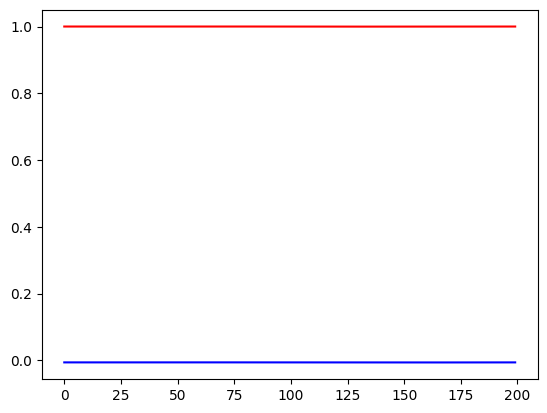

In [30]:
#prec is the ratio of virtual displacement size to step size in the curve
def backward_solver_edit(curve, L, N, prec=1e-7, p=1):

    curve_copy = curve.copy()
    curve_copy = np.vstack([curve_copy, curve_copy[0]])
    curve_copy = augment_curve(curve_copy, N)

    step_theta = L / N

    #generate vdisps
    epsilon = step_theta * prec
    vdisps = np.random.rand(2 * len(curve_copy), 2) - 0.5
    vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, np.newaxis]
    vdisps = vdisps * epsilon

    #external force densities    
    forces_perp = p * unit_normals(curve_copy)

    A = populate_matrix(curve_copy, step_theta, vdisps)
    b = populate_rhs(curve_copy, forces_perp, vdisps)

    #solve the system
    x = np.linalg.solve(A, b)

    sigmas = x[0::2]
    ms = x[1::2]
    
    return sigmas, ms

sigmas, ms = backward_solver_edit(curve, 2*np.pi, len(curve))

plt.plot(sigmas, label='sigma', color='red')
plt.plot(ms, label='m', color='blue')

#CURRENTLY TESTING
#whether interpolation improves working version
#testing out the bug (why do exact normals work??)

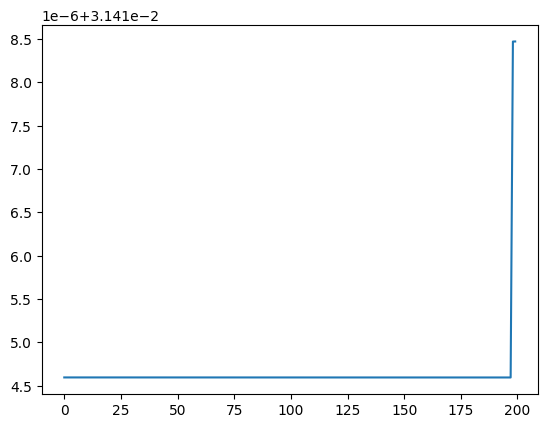

In [31]:
curve_copy=curve.copy()[:-1]
curve_copy = np.vstack([curve_copy, curve_copy[0]])
curve_copy = augment_curve(curve_copy, len(curve))
plt.plot([ds(curve_copy, i) for i in range(len(curve_copy))])

In [29]:
ds(curve_copy, len(curve_copy)-1)

np.float64(0.0625167281295576)

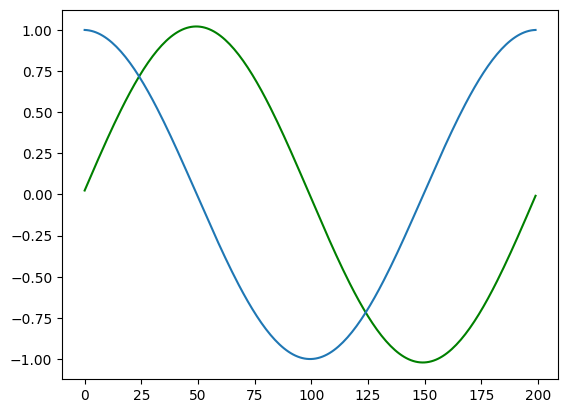

In [ ]:
forces_perp = 1 * unit_normals(curve)
forces_perp2 = curve * p / R

plt.plot(-(forces_perp[:,0] - forces_perp2[:,0])*65, label='force', color='green')
plt.plot(forces_perp2[:, 0])

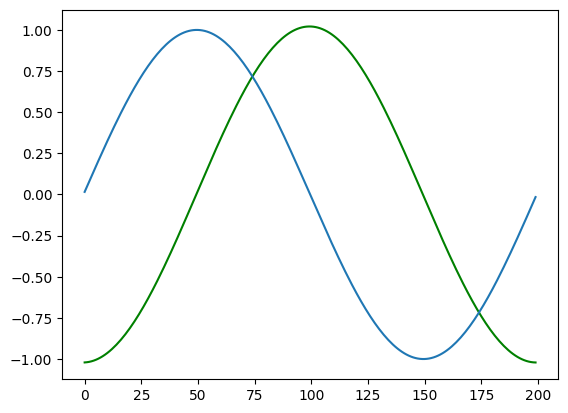

In [40]:
forces_perp = 1 * unit_normals(curve)
forces_perp2 = curve * p / R

plt.plot(-(forces_perp[:,1] - forces_perp2[:,1])*65, label='force', color='green')
plt.plot(forces_perp2[:, 1])

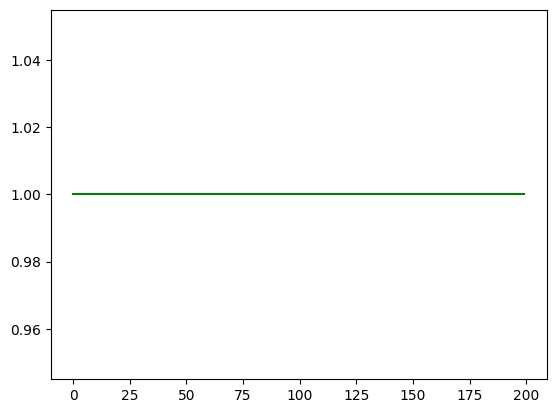

In [42]:
plt.plot(np.linalg.norm(forces_perp2, axis=1), label='force', color='green')

/var/folders/tw/wwds8prs35n99xx6b_5911sh0000gn/T/ipykernel_95180/6069725.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.arctan(forces_perp2[:lim,1]/forces_perp2[:lim,0]) - np.arctan(forces_perp[:lim,1]/forces_perp[:lim,0]), label='force', color='green')


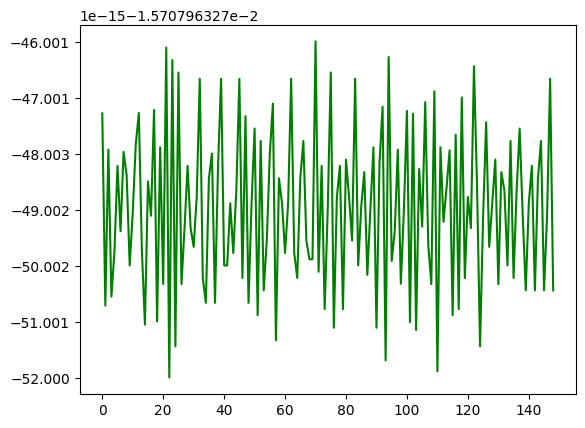

In [48]:
lim = 149
plt.plot(np.arctan(forces_perp2[:lim,1]/forces_perp2[:lim,0]) - np.arctan(forces_perp[:lim,1]/forces_perp[:lim,0]), label='force', color='green')

## My face when it works :0

what the hell I thought we just concluded that it does not work. Ok do not touch this cell this is gold.^^

## OK Next displace all points normally

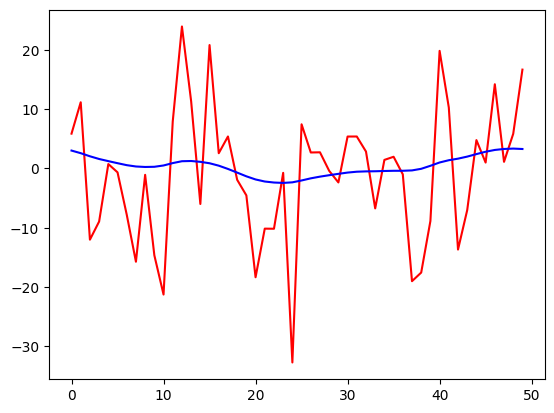

In [ ]:
# #returns array of shape (2 * len(curve), len(curve), 2) with vdisps
# def gen_global_vdisps(curve, vdisp_type='normal', prec=0.00001):
#     vdisps = np.zeros((2 * len(curve), len(curve), 2))

#     if vdisp_type != 'normal':
#         return
    
#     for i in range(len(curve)):
#         point = curve[i]
#         temp = curve.copy()
#         temp[i] = point + prec * unit_normals(curve)[i]
#         vdisps[2 * i, i] = prec * unit_normals(curve)[i]
#         vdisps[2 * i + 1, i] = prec * unit_normals(curve)[i]

#     return vdisps


#populates matrix with set of vdisps (as in with 2N displaced
# curves each displaced everywhere, not just at one point)
#it will return lin comb of different dg's from different displaced points so on.
# # THIS IS A HACK
# I HAVE THOUGHT OF AN EXACT WAY TO DO THIS ALSO BUT IT INVOLVES REWRITING
# THE POPULATE MATRIX FUNCTION COMPLETELY.

import numpy as np
from helper_functions import *

p = 1

def populate_matrix_set(curve, fns, vdisp_type='normal', prec=1e-9):
    matrix = np.zeros((2 * len(curve), 2 * len(curve)))
    rhs = np.zeros(2 * len(curve))

    L = np.sum([ds(curve, i) for i in range(len(curve))])

    for i in range(len(curve) * 2):
        #in testing we will see what this does for convergence
        extra_factor = 1

        # some funky epsilon distribution, a bit complicated
        epsilon = prec * np.array([ds(curve, j // 2) for j in range(len(curve) * 2)])
        epsilon *= np.random.rand(len(epsilon))
        epsilon = np.array([epsilon, epsilon]).T


        vdisps = np.zeros((2 * len(curve), 2))
        vdisps[0::2, :] = unit_normals(curve)
        vdisps[1::2, :] = unit_normals(curve)
        vdisps = vdisps * epsilon * extra_factor
        step_theta = ds(curve, 0)

        step_theta = L / len(curve)

        A = populate_matrix(curve, step_theta, vdisps)

        matrix[i] = np.sum(A[0::2], axis=0)
        
        rhs[i] = 0
        for j in range(len(curve)):
            rhs[i] += -np.dot(unit_normals(curve)[j], vdisps[j * 2]) * ds(curve, j) * fns[j]

    return matrix, rhs

N_points = 50
R = 1
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T
fns = p * np.ones(len(curve))

A, rhs = populate_matrix_set(curve, fns)
soln = np.linalg.solve(A, rhs)

sigmas = soln[0::2]
ms = soln[1::2]

plt.plot(sigmas, label='sigma', color='red')
plt.plot(ms, label='m', color='blue')

## OK now displace them at random

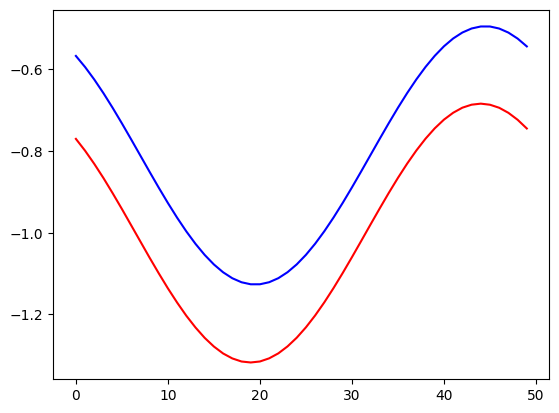

In [2]:
import numpy as np
from helper_functions import *

p = 1

def populate_matrix_set_hack(curve, p=1, prec=1e-9):
    matrix = np.zeros((2 * len(curve), 2 * len(curve)))
    rhs = np.zeros(2 * len(curve))
    fns = p * np.ones(len(curve)) #normal forces

    L = np.sum([ds(curve, i) for i in range(len(curve))])

    for i in range(len(curve) * 2):
        #in testing we will see what this does for convergence
        extra_factor = 1

        step_theta = L / len(curve)

        epsilon = step_theta * prec
        vdisps = np.random.rand(2 * len(curve), 2)
        vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, np.newaxis]
        vdisps = vdisps * epsilon

        A = populate_matrix(curve, step_theta, vdisps)

        matrix[i] = np.sum(A[0::2], axis=0)
        
        rhs[i] = 0
        for j in range(len(curve)):
            rhs[i] += -np.dot(unit_normals(curve)[j], vdisps[j * 2]) * ds(curve, j) * fns[j]

    return matrix, rhs


N_points = 50
R = 1
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

A, rhs = populate_matrix_set_hack(curve)
soln = np.linalg.solve(A, rhs)

sigmas = soln[0::2]
ms = soln[1::2]

plt.plot(sigmas, label='sigma', color='red')
plt.plot(ms, label='m', color='blue')

In [ ]:
l = np.array([1, 2, 3, 4, 5, 6])

print(np.vstack((l, l)).T)
print(np.array([l, l]).T)


[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]


### Let me just write here how I would do it so I do not forget

The method is to write one function which generates 2N curves which are global displacements of the original curve then in in the new populate matrix function we take the difference in curvature of each of these curves each point to generate the 2N by 2N matrix. It is very simple and also exact because it calculates the exact curvature change eg. Correct to any order.